In [1]:
import requests
import json
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df_metacritics_raw = pd.read_csv(r'D:\IronHack\IronHack_Classes\Week 5\Video_game_project\JV_DataSets\MetaCritics\metacritics_raw.csv')

In [4]:
df_metacritics_raw

,metascore,name,console,userscore,date
0,97,Grand Theft Auto V,PS3,8.3,"Sep 17, 2013"
1,97,Grand Theft Auto V,X360,8.3,"Sep 17, 2013"
2,95,The Last of Us,PS3,9.2,"Jun 14, 2013"
3,94,BioShock Infinite,PS3,8.5,"Mar 26, 2013"
4,94,BioShock Infinite,PC,8.6,"Mar 25, 2013"
...,...,...,...,...,...
15642,38,Touhou Kobuto V: Burst Battle,Switch,4.6,"Oct 10, 2017"
15643,38,Randall,PS4,2.1,"Jun 6, 2017"
15644,36,Tokyo Tattoo Girls,VITA,5.4,"Nov 14, 2017"
15645,26,Road Rage,PS4,2.5,"Nov 14, 2017"


# Part 1 : Data gathering & Data cleaning

### Data Wrangling : modifying column types when needed (datetime, userscore in float)

In [5]:
df_metacritics_raw['console'].unique()

array(['PS3', 'X360', 'PC', 'WIIU', '3DS', 'PS4', 'VITA', 'XONE',
       'Switch', 'WII', 'DS', 'PSP', 'PS2', 'XBOX', 'GBA', 'N64', 'DC',
       'GC', 'PS', ' PC', ' VITA'], dtype=object)

In [6]:
df_metacritics_raw['userscore'] = df_metacritics_raw['userscore'].str.replace(r'tbd','0').astype(float)

In [7]:
df_metacritics_raw.userscore = df_metacritics_raw.userscore.astype(float)

In [8]:
df_metacritics_raw['date'] =  pd.to_datetime(df_metacritics_raw['date'])

In [9]:
df_metacritics_raw

,metascore,name,console,userscore,date
0,97,Grand Theft Auto V,PS3,8.3,2013-09-17
1,97,Grand Theft Auto V,X360,8.3,2013-09-17
2,95,The Last of Us,PS3,9.2,2013-06-14
3,94,BioShock Infinite,PS3,8.5,2013-03-26
4,94,BioShock Infinite,PC,8.6,2013-03-25
...,...,...,...,...,...
15642,38,Touhou Kobuto V: Burst Battle,Switch,4.6,2017-10-10
15643,38,Randall,PS4,2.1,2017-06-06
15644,36,Tokyo Tattoo Girls,VITA,5.4,2017-11-14
15645,26,Road Rage,PS4,2.5,2017-11-14


### Aligning Metascore with userscore over a 10 point scale

In [10]:
df_metacritics_raw['metascore'] = df_metacritics_raw['metascore']/10

In [11]:
df_metacritics_raw

,metascore,name,console,userscore,date
0,9.7,Grand Theft Auto V,PS3,8.3,2013-09-17
1,9.7,Grand Theft Auto V,X360,8.3,2013-09-17
2,9.5,The Last of Us,PS3,9.2,2013-06-14
3,9.4,BioShock Infinite,PS3,8.5,2013-03-26
4,9.4,BioShock Infinite,PC,8.6,2013-03-25
...,...,...,...,...,...
15642,3.8,Touhou Kobuto V: Burst Battle,Switch,4.6,2017-10-10
15643,3.8,Randall,PS4,2.1,2017-06-06
15644,3.6,Tokyo Tattoo Girls,VITA,5.4,2017-11-14
15645,2.6,Road Rage,PS4,2.5,2017-11-14


### Keeping only consoles & dropping PCs

In [12]:
df_metacritics_consoles = df_metacritics_raw[df_metacritics_raw['console'] != 'PC']

In [13]:
df_metacritics_consoles

,metascore,name,console,userscore,date
0,9.7,Grand Theft Auto V,PS3,8.3,2013-09-17
1,9.7,Grand Theft Auto V,X360,8.3,2013-09-17
2,9.5,The Last of Us,PS3,9.2,2013-06-14
3,9.4,BioShock Infinite,PS3,8.5,2013-03-26
5,9.3,BioShock Infinite,X360,8.5,2013-03-26
...,...,...,...,...,...
15642,3.8,Touhou Kobuto V: Burst Battle,Switch,4.6,2017-10-10
15643,3.8,Randall,PS4,2.1,2017-06-06
15644,3.6,Tokyo Tattoo Girls,VITA,5.4,2017-11-14
15645,2.6,Road Rage,PS4,2.5,2017-11-14


In [14]:
df_metacritics_consoles.drop(df_metacritics_consoles.loc[df_metacritics_consoles['console']=='PC'].index, inplace=True)

c:\users\langl\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
df_metacritics_consoles

,metascore,name,console,userscore,date
0,9.7,Grand Theft Auto V,PS3,8.3,2013-09-17
1,9.7,Grand Theft Auto V,X360,8.3,2013-09-17
2,9.5,The Last of Us,PS3,9.2,2013-06-14
3,9.4,BioShock Infinite,PS3,8.5,2013-03-26
5,9.3,BioShock Infinite,X360,8.5,2013-03-26
...,...,...,...,...,...
15642,3.8,Touhou Kobuto V: Burst Battle,Switch,4.6,2017-10-10
15643,3.8,Randall,PS4,2.1,2017-06-06
15644,3.6,Tokyo Tattoo Girls,VITA,5.4,2017-11-14
15645,2.6,Road Rage,PS4,2.5,2017-11-14


In [16]:
df_metacritics_consoles.console.unique()

array(['PS3', 'X360', 'WIIU', '3DS', 'PS4', 'VITA', 'XONE', 'Switch',
       'WII', 'DS', 'PSP', 'PS2', 'XBOX', 'GBA', 'N64', 'DC', 'GC', 'PS',
       ' PC', ' VITA'], dtype=object)

### Adding Game Genre column

Importing new dataframe based on genre information from VG Sales

In [17]:
gamescraping = pd.read_csv(r'D:\IronHack\IronHack_Classes\Week 5\Video_game_project\JV_DataSets\2019\vgsales-12-4-2019-short.csv')

In [18]:
#Data Wrangling, aligning column names with origianl metascore dataframe
gamescraping.rename(columns={'Name':'name', 'Genre':'genre'}, inplace=True)

In [19]:
gamescraping

,Rank,name,genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55787,55788,Indivisible,Role-Playing,NaN,PC,505 Games,Lab Zero Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55788,55789,Lost Ember,Adventure,RP,PC,Mooneye Studios,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55789,55790,Lost Ember,Adventure,RP,PS4,Mooneye Studios,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55790,55791,Lost Ember,Adventure,RP,XOne,Mooneye Studios,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0


In [20]:
#left join on MetaCritics table - if no Genre existing, keep the line
df_metacritics_genre_consoles_raw = pd.merge(df_metacritics_consoles, gamescraping[['name','genre']], on='name', how='inner')

In [21]:
#Duplicates created when merging both tables (same game appear on several consoles & create duplicate rows)
df_metacritics_genre_consoles_raw.drop_duplicates(inplace=True)

In [22]:
#Droping 'Misc' column & droping duplicate columns

In [23]:
df_metacritics_genre_consoles = df_metacritics_genre_consoles_raw[df_metacritics_genre_consoles_raw['genre'] != 'Misc']

In [24]:
df_metacritics_genre_consoles.drop_duplicates(subset=['name', 'console'], inplace=True)

<ipython-input-24-37ff3299eeef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metacritics_genre_consoles.drop_duplicates(subset=['name', 'console'], inplace=True)


In [25]:
#Sorting values & reseting index
df_metacritics_genre_consoles.sort_values(by='metascore', ascending=False, inplace=True)

<ipython-input-25-c38229752ab1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metacritics_genre_consoles.sort_values(by='metascore', ascending=False, inplace=True)


In [26]:
df_metacritics_genre_consoles.reset_index(drop=True, inplace=True)

#### Data Wrangling  
merging 3 genres very similiar, i.e 'Action', 'Adventure' & 'Action-Adventure' into one single meta 'Action-Adventure' genre

In [27]:
df_metacritics_genre_consoles

,metascore,name,console,userscore,date,genre
0,9.8,Grand Theft Auto IV,PS3,7.5,2008-04-29,Action
1,9.8,Red Dead Redemption 2,XONE,5.9,2018-10-26,Action-Adventure
2,9.8,Tony Hawk's Pro Skater 2,PS,7.4,2000-09-20,Sports
3,9.8,Grand Theft Auto IV,X360,7.9,2008-04-29,Action
4,9.7,Super Mario Galaxy,WII,9.0,2007-11-12,Platform
...,...,...,...,...,...,...
8768,1.8,SPOGS Racing,WII,3.6,2008-07-07,Racing
8769,1.7,Yaris,X360,4.2,2007-10-10,Racing
8770,1.7,Leisure Suit Larry: Box Office Bust,PS3,1.9,2009-05-05,Adventure
8771,1.7,Vroom in the Night Sky,Switch,3.1,2017-04-05,Racing


In [28]:
df_metacritics_genre_consoles.rename(columns={'userscore':'playerscore'},inplace=True)

c:\users\langl\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [29]:
df_metacritics_genre_consoles['genre'] = df_metacritics_genre_consoles['genre'].str.replace('Action-Adventure','Action').str.replace('Adventure','Action').str.replace('Action','Action-Adventure')

<ipython-input-29-abcb528c47f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metacritics_genre_consoles['genre'] = df_metacritics_genre_consoles['genre'].str.replace('Action-Adventure','Action').str.replace('Adventure','Action').str.replace('Action','Action-Adventure')


In [30]:
df_metacritics_genre_consoles

,metascore,name,console,playerscore,date,genre
0,9.8,Grand Theft Auto IV,PS3,7.5,2008-04-29,Action-Adventure
1,9.8,Red Dead Redemption 2,XONE,5.9,2018-10-26,Action-Adventure
2,9.8,Tony Hawk's Pro Skater 2,PS,7.4,2000-09-20,Sports
3,9.8,Grand Theft Auto IV,X360,7.9,2008-04-29,Action-Adventure
4,9.7,Super Mario Galaxy,WII,9.0,2007-11-12,Platform
...,...,...,...,...,...,...
8768,1.8,SPOGS Racing,WII,3.6,2008-07-07,Racing
8769,1.7,Yaris,X360,4.2,2007-10-10,Racing
8770,1.7,Leisure Suit Larry: Box Office Bust,PS3,1.9,2009-05-05,Action-Adventure
8771,1.7,Vroom in the Night Sky,Switch,3.1,2017-04-05,Racing


### Adding Brand column for each console

In [31]:
# Adding Brand column for each console
condlist = [df_metacritics_genre_consoles["console"].str.startswith('PS'),df_metacritics_genre_consoles["console"].str.startswith('VIT'),
            df_metacritics_genre_consoles["console"].str.startswith('X'),
           df_metacritics_genre_consoles["console"].str.startswith('DC')]
choicelist = ["Sony", "Sony", "Microsoft", "Sega"]
df_metacritics_genre_consoles["brand"] = np.select(condlist, choicelist, default='Nintendo')

df_metacritics_genre_consoles

<ipython-input-31-47379c6b4cfe>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metacritics_genre_consoles["brand"] = np.select(condlist, choicelist, default='Nintendo')


,metascore,name,console,playerscore,date,genre,brand
0,9.8,Grand Theft Auto IV,PS3,7.5,2008-04-29,Action-Adventure,Sony
1,9.8,Red Dead Redemption 2,XONE,5.9,2018-10-26,Action-Adventure,Microsoft
2,9.8,Tony Hawk's Pro Skater 2,PS,7.4,2000-09-20,Sports,Sony
3,9.8,Grand Theft Auto IV,X360,7.9,2008-04-29,Action-Adventure,Microsoft
4,9.7,Super Mario Galaxy,WII,9.0,2007-11-12,Platform,Nintendo
...,...,...,...,...,...,...,...
8768,1.8,SPOGS Racing,WII,3.6,2008-07-07,Racing,Nintendo
8769,1.7,Yaris,X360,4.2,2007-10-10,Racing,Microsoft
8770,1.7,Leisure Suit Larry: Box Office Bust,PS3,1.9,2009-05-05,Action-Adventure,Sony
8771,1.7,Vroom in the Night Sky,Switch,3.1,2017-04-05,Racing,Nintendo


In [32]:
df_metacritics_genre_consoles.describe()

,metascore,playerscore
count,8773.000000,8773.000000
mean,6.996341,6.449048
std,1.296864,2.472674
min,1.100000,0.000000
25%,6.200000,6.000000
50%,7.200000,7.300000
75%,7.900000,8.000000
max,9.800000,9.400000


In [93]:
df_metacritics_genre_consoles.to_csv('df_metacritics_genre_consoles.csv')

### Creating dataframe for Top Games in terms of Metascore

The mean is at 6.99 for metascore, to study the best game, we will focus on game having a metascore over that mean value

In [34]:
df_metacritics_top_game = df_metacritics_genre_consoles[df_metacritics_genre_consoles['metascore'] > df_metacritics_genre_consoles['metascore'].mean()]

In [35]:
df_metacritics_top_game.sort_values(by='metascore', ascending=False, inplace=True)

<ipython-input-35-ffdd4abda353>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metacritics_top_game.sort_values(by='metascore', ascending=False, inplace=True)


In [36]:
df_metacritics_top_game.reset_index(drop=True, inplace=True)

In [55]:
df_metacritics_top_game.head(40)

,metascore,name,console,playerscore,date,genre,brand
0,9.8,Grand Theft Auto IV,PS3,7.5,2008-04-29,Action-Adventure,Sony
1,9.8,Tony Hawk's Pro Skater 2,PS,7.4,2000-09-20,Sports,Sony
2,9.8,Grand Theft Auto IV,X360,7.9,2008-04-29,Action-Adventure,Microsoft
3,9.8,Red Dead Redemption 2,XONE,5.9,2018-10-26,Action-Adventure,Microsoft
4,9.7,Grand Theft Auto V,PS3,8.3,2013-09-17,Action-Adventure,Sony
5,9.7,Grand Theft Auto III,PS2,8.5,2001-10-22,Action-Adventure,Sony
6,9.7,Super Mario Galaxy 2,WII,9.1,2010-05-23,Platform,Nintendo
7,9.7,Metroid Prime,GC,9.2,2002-11-17,Shooter,Nintendo
8,9.7,Grand Theft Auto V,PS4,8.3,2014-11-18,Action-Adventure,Sony
9,9.7,Grand Theft Auto V,XONE,7.8,2014-11-18,Action-Adventure,Microsoft


In [38]:
# V2 with metacritics > 8 to reduce number of plots on scatter plots

In [39]:
# df_metacritics_top_game_8 = df_metacritics_genre_consoles[df_metacritics_genre_consoles['metascore'] > 8]

In [40]:
# df_metacritics_top_game_8

In [41]:
df_metacritics_top_game_8_5 = df_metacritics_genre_consoles[df_metacritics_genre_consoles['metascore'] >= 8.5]

In [42]:
df_metacritics_top_game_8_5

,metascore,name,console,playerscore,date,genre,brand
0,9.8,Grand Theft Auto IV,PS3,7.5,2008-04-29,Action-Adventure,Sony
1,9.8,Red Dead Redemption 2,XONE,5.9,2018-10-26,Action-Adventure,Microsoft
2,9.8,Tony Hawk's Pro Skater 2,PS,7.4,2000-09-20,Sports,Sony
3,9.8,Grand Theft Auto IV,X360,7.9,2008-04-29,Action-Adventure,Microsoft
4,9.7,Super Mario Galaxy,WII,9.0,2007-11-12,Platform,Nintendo
...,...,...,...,...,...,...,...
972,8.5,Metroid: Samus Returns,3DS,8.9,2017-09-15,Action-Adventure,Nintendo
973,8.5,Dragon Quest VIII: Journey of the Cursed King,3DS,8.7,2017-01-20,Role-Playing,Nintendo
974,8.5,Dragon Age: Inquisition,XONE,7.0,2014-11-18,Role-Playing,Microsoft
975,8.5,BattleBlock Theater,X360,7.9,2013-04-03,Platform,Microsoft


In [43]:
# df_metacritics_top_game_8_5.to_csv('df_metacritics_top_game_8_5.csv')

In [44]:
# OLD VERSION = TOP 300

# df_metacritics_top_game_300 = df_metacritics_genre_consoles[df_metacritics_genre_consoles['metascore'] > 8.9]

# df_metacritics_top_game_300

In [51]:
df_metacritics_top_game_8_5.console.unique()

array(['PS3', 'XONE', 'PS', 'X360', 'WII', 'N64', 'DC', 'Switch', 'XBOX',
       'PS2', 'PS4', 'GC', 'WIIU', 'GBA', '3DS', 'VITA', 'DS', 'PSP'],
      dtype=object)

In [47]:
# df_metacritics_top_game_300.sort_values(by='metascore', ascending=False, inplace=True)

In [54]:
# df_metacritics_top_game_300.head(50)

### Creating a Pivot Table grouping Genres by Consoles

In [ ]:
pivot = pd.pivot_table(df_metacritics_genre_consoles, values="name", index=['console', 'genre'], aggfunc={"name":"count"})
# pivot.reset_index(inplace=True)
pivot.rename(columns={"name":"count"}, inplace=True)
pivot

In [ ]:
pivot.head(50)

In order to isolate outliers, Pivot DataFrame only focus on genre having more than 10 values

In [ ]:
pivot_to_work = pivot[pivot['count']>10]

In [ ]:
pivot_to_work

In [ ]:
# pivot_to_work.to_csv('pivot3.csv')

In [ ]:
# pivot.to_csv('pivot_tableto_stack.csv')

In [ ]:
df_metascore_groupby = df_metacritics_genre_consoles.groupby('console').mean().sort_values(by='metascore', ascending=False)

In [ ]:
df_metascore_groupby

#### Grouping By Metacritics by Console

In [ ]:
# df_groupby_metacritics_console = df_metacritics_genre_consoles.groupby('console').mean().sort_values(by='metascore', ascending=False)

In [71]:
df_groupby_metacritics_console_brand = df_metacritics_genre_consoles.groupby(['console', 'brand']).mean().sort_values(by='metascore', ascending=False)

In [72]:
df_groupby_metacritics_console = df_metacritics_genre_consoles.groupby('console').mean().sort_values(by='metascore', ascending=False)

In [73]:
df_groupby_metacritics_console

,metascore,playerscore
console,,
DC,7.408571,6.175238
Switch,7.363914,7.008563
WIIU,7.337255,7.324510
N64,7.320690,7.186207
XONE,7.284444,6.056970
VITA,7.190728,7.342384
PS4,7.171464,6.381673
GC,7.110256,6.428974
PS3,7.109063,6.686200


In [81]:
df_groupby_metacritics_brand = df_metacritics_genre_consoles.groupby(['console', 'brand']).mean().sort_values(by='metascore', ascending=False)

In [85]:
df_groupby_metacritics_brand.reset_index(inplace=True)

# Part 2 : Data Analysis & Chart creation

### Scatter plot illustrates distribution of metascore per platform

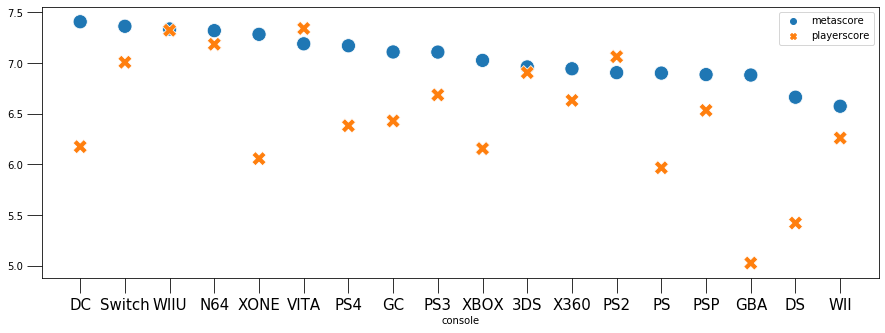

In [75]:
#Creating a scatter plot to measure out the difference of average Metascore VS. Playerscore
plt.figure(figsize=(15,5))
avg = sns.scatterplot(data=df_groupby_metacritics_console, s=200)
plt.xticks(size=15)
plt.tick_params(size=15)
# plt.savefig('svm_conf.png', dpi=500)

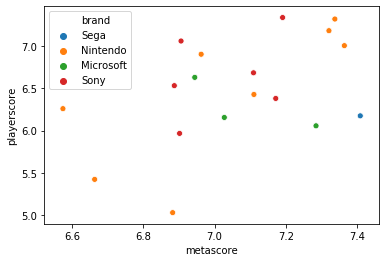

In [86]:
sns.scatterplot(x='metascore', y='playerscore', data=df_groupby_metacritics_brand, hue='brand')

# sns.scatterplot(x='metascore', y='userscore',data=df_metacritics_top_game_150)  kind='box',height=10, aspect=3, 

In [88]:
df_PS4 = df_metacritics_genre_consoles[df_metacritics_genre_consoles['console'] == 'PS4']
df_XOne = df_metacritics_genre_consoles[df_metacritics_genre_consoles['console'] == 'XONE']
df_Switch = df_metacritics_genre_consoles[df_metacritics_genre_consoles['console'] == 'Switch']
df_PS3 = df_metacritics_genre_consoles[df_metacritics_genre_consoles['console'] == 'PS3']

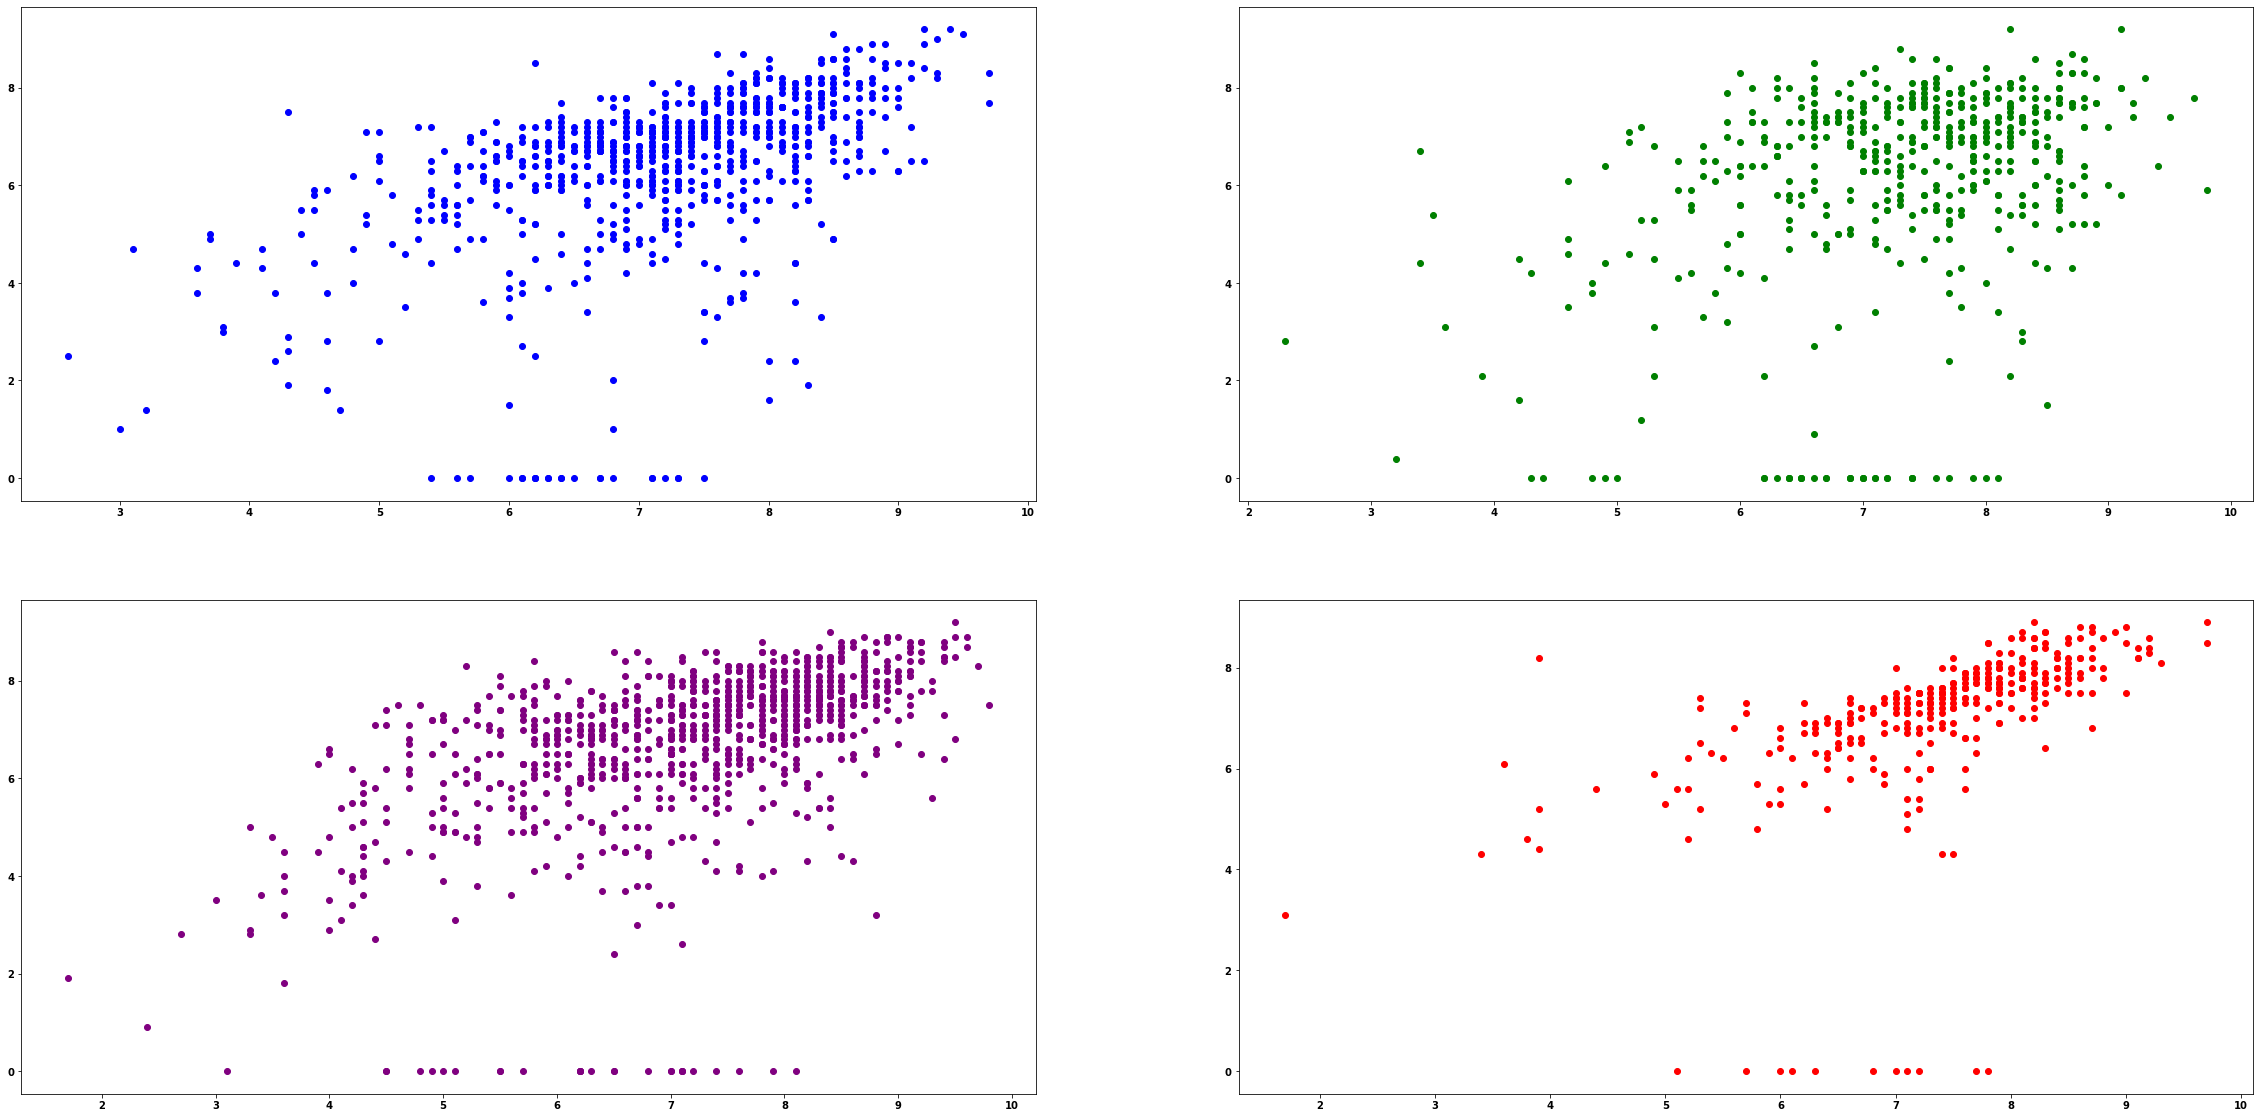

In [92]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = [40,20]
plt.rcParams["font.weight"] = "bold"

plt.subplots_adjust(wspace=0.2, hspace=0.2)

ax1 = fig.add_subplot(221)
ax1.scatter('metascore', 'playerscore', data=df_PS4, c='blue')
# ax1.set_title('Spring', fontdict=fontdict, color="green")
# ax1.set_ylabel("Count of Total Rental Bikes", fontdict=fontdicty, position=(0,-0.1))

ax2 = fig.add_subplot(222)
ax2.scatter('metascore', 'playerscore', data=df_XOne, c="green")

ax3 = fig.add_subplot(223)
ax3.scatter('metascore', 'playerscore', data=df_PS3, color='purple')
# ax3.set_title('Fall or Autumn', fontdict=fontdict, color="brown")


ax4 = fig.add_subplot(224)
ax4.scatter('metascore', 'playerscore', data=df_Switch, c="red")
# ax4.set_title("Winter", fontdict=fontdict, color="blue")
# fig.suptitle('Sharing x per column, y per row')

plt.show()    
#       spring = plt.scatter('temp', 'cnt', data=day[day['season']==1], marker='o', color='green')
# summer = plt.scatter('temp', 'cnt', data=day[day['season']==2], marker='o', color='orange')
# autumn = plt.scatter('temp', 'cnt', data=day[day['season']==3], marker='o', color='brown')
# winter = plt.scatter('temp', 'cnt', data=day[day['season']==4], marker='o', color='blue')
# plt.legend(handles=(spring,summer,autumn,winter),

### Catplot illustrates distribution of metascore per platform

Creating several Box plots & Scatter plots to measure the variation of Scores between Metascore & Playerscore on different consoles

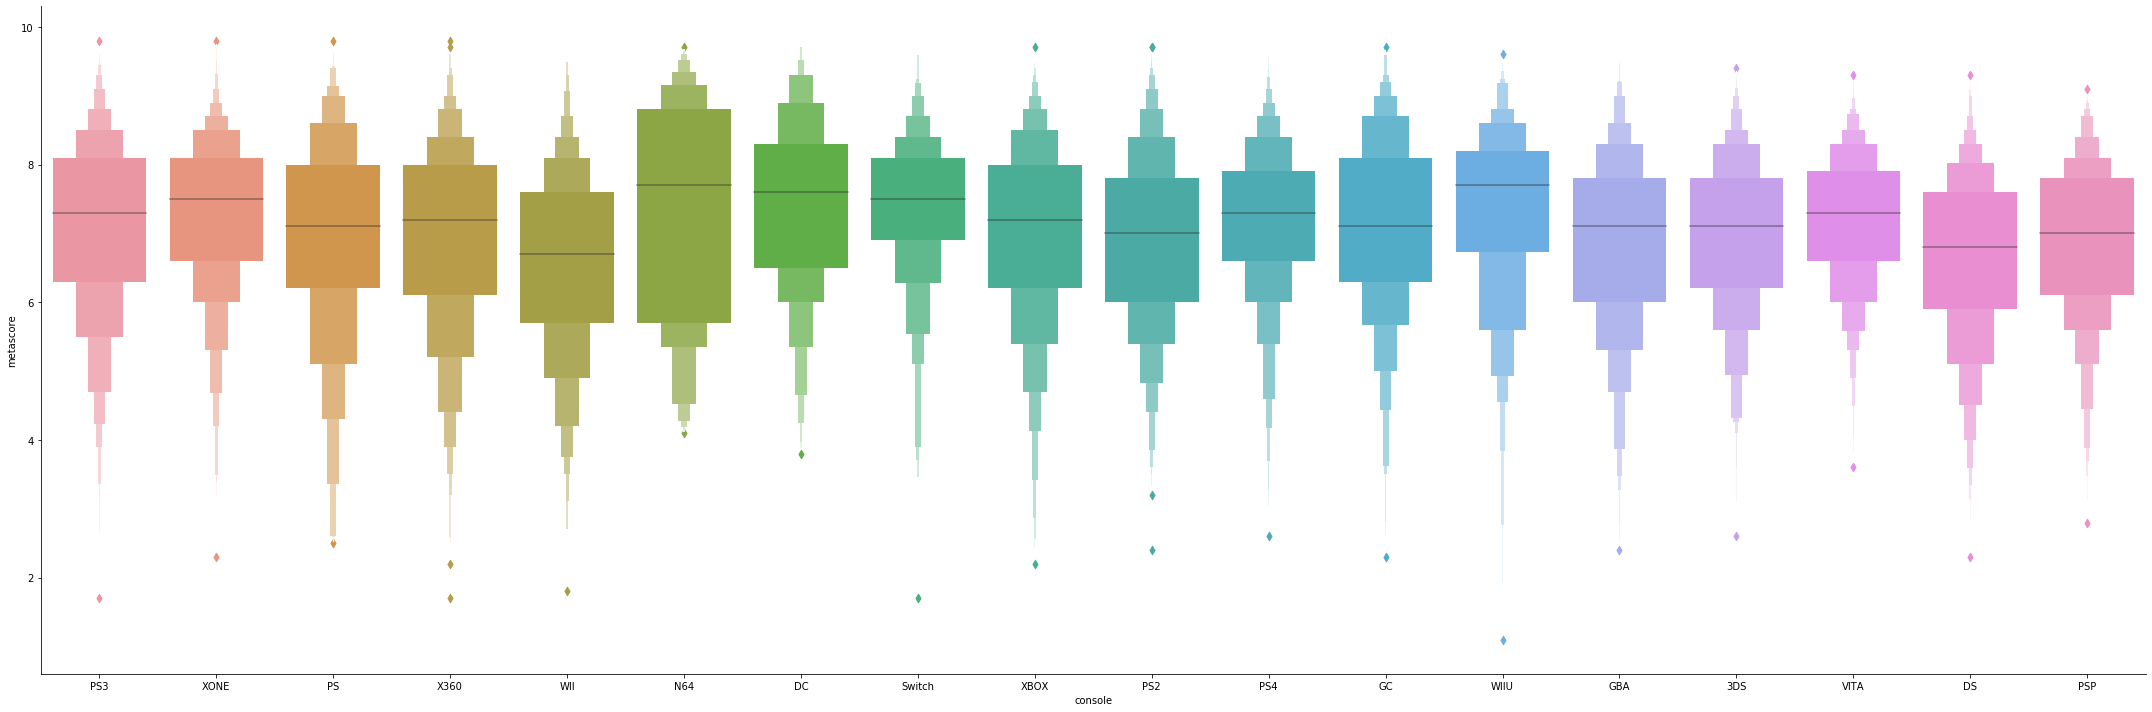

In [57]:
sns.catplot(x='console',y='metascore', kind='boxen',height=10,aspect=3, data=df_metacritics_genre_consoles)

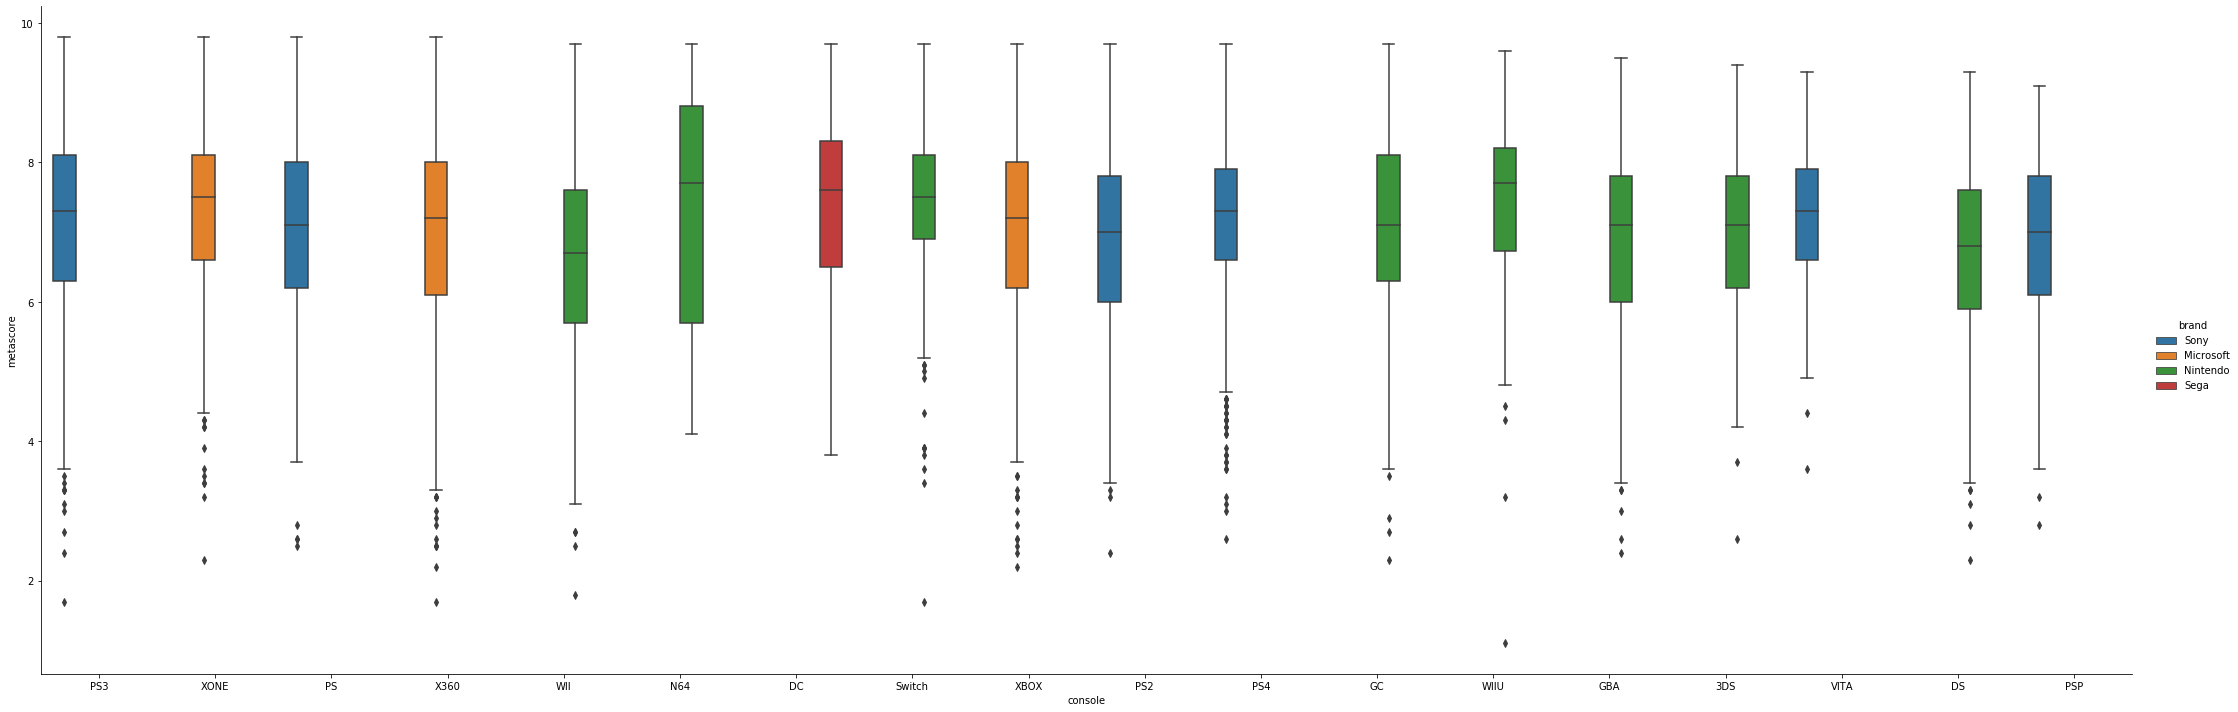

In [56]:
#Catplot with Hue per console - but rather hard to read (tweaking the size of boxplot does not change the width of the box)
sns.catplot(x='console',y='metascore', kind='box',height=10, aspect=3, hue='brand', data=df_metacritics_genre_consoles)